### Evaluación 1. Parte Computacional (60 puntos) 
#### (Elementos de Probabilidad y Estadística: 3008450)

Se tiene información acerca de 694 propiedades ubicadas en el valle de aburra. La base de datos fue recolectada en el año 2015, e incluye las siguientes variables: 
1. valor comercial de la propiedad en millones de pesos `precio`
2. el área de la propiedad en metros cuadrados `mt2`
3. el sector donde está ubicada la propiedad `ubicacion`
4. el estrato socieconómico al que pertenece `estrato`
5. el número de alcobas `alcobas`
6. el número de baños `banos`
7. si tiene o no balcón `balcon`
8. si tiene o no parqueadero `parqueadero`
9. el valor de la administración en millones de pesos `administracion`
10. el avalúo catastral en millones de pesos `avaluo` y si la propiedad tiene o no mejoras desde que fue entregado como nuevo `terminado`. 

La base de datos está disponible en: [**https://tinyurl.com/hwhb769**](https://tinyurl.com/hwhb769)

Con estos datos resuelva los siguientes puntos:

1. Recategorice la variable estrato así: `medio-bajo` para los estratos 2 y 3, `medio-alto` para los estratos 4 y 5, y `alto` para el estrato 6.
2. Realice un análisis descriptivo de las variables de la base de datos y resalte las características más destacadas de cada una de ellas. Utilice todos los gráficos y resúmenes que considere pertinentes.
3. Elabore una tabla de doble entrada donde relacione si la propiedad tiene o no mejoras con la nueva categorización de la variable estrato. ¿En cuál de los nuevos estratos se presenta la mayor proporción de propiedades que tienen mejoras? Explique.
4. Elabore un histograma de frecuencias relativas para la variable precio. ¿Qué observa? Comente
5. ¿Es muy diferente el comportamiento de los precios de las propiedades de acuerdo a la ubicación? Comente. Elabore los gráficos y/o resúmenes que considere pertinentes. 
6. Grafique un diagrama de dispersión de las variables avalúo y precio. ¿Qué observa? ¿Qué pasa si los puntos graficados se separan por color de acuerdo a la nueva categorización del estrato?. Explique.
7. Calcule el coeficiente de correlación de Pearson entre precio y avalúo. ¿Qué se puede decir sobre este valor?
8. Realice un análisis descriptivo adicional que considere pertinente sobre una o varias de las variables restantes de la base de datos.

In [5]:
# importar librerias
import pandas as pd
from bokeh.server.server import Server
from bokeh.application import Application
from bokeh.application.handlers.function import FunctionHandler
from bokeh.io import output_notebook, push_notebook, show
from bokeh.layouts import column, row, gridplot
from bokeh.models import ColumnDataSource, DataTable, TableColumn, NumberFormatter, Select, MultiSelect, BoxSelectTool, LassoSelectTool, CategoricalColorMapper
from bokeh.plotting import figure
import numpy as np
import matplotlib.pyplot as plt
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap
output_notebook()

Loading BokehJS ...

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/fhernanb/datos/master/aptos2015',sep='\s+', header=4)
df['estrato'] = df.estrato.apply(lambda x: 'medio-bajo' if x < 3.1 else('medio-alto' if x < 5.1  else 'alto'))

Recategorice la variable estrato así: medio-bajo para los estratos 2 y 3, medio-alto para los estratos 4 y 5, y alto para el estrato 6. <br>
Realice un análisis descriptivo de las variables de la base de datos y resalte las características más destacadas de cada una de ellas. Utilice todos los gráficos y resúmenes que considere pertinentes.

In [50]:
def modify_doc(doc):
    
    def update():

        current = df[(df.estrato.isin([str(x) for x in estrato.value])) & (df.ubicacion.isin([str(x) for x in ubicacion.value])) & 
                     (df.alcobas.isin([int(x) for x in alcobas.value])) & (df.banos.isin([int(x) for x in banos.value])) &
                     (df.parqueadero.isin([str(x) for x in parqueadero.value])) & (df.terminado.isin([str(x) for x in terminado.value]))]
        source.data = current
        source_static.data = current.describe()[['precio', 'mt2', 'alcobas', 'banos', 'administracion', 'avaluo']].reset_index()
        corr.xaxis.axis_label = ticker1.value
        corr.yaxis.axis_label = ticker2.value
        plot_source.data = {'x': current[ticker1.value], 'y': current[ticker2.value], 'legend': [str(x) for x in current[ticker4.value]],
                           'color': current[ticker4.value].replace(dict(zip(current[ticker4.value].unique(),Spectral6)))}
        hist_1, hedges_1 = np.histogram(current[ticker1.value], density=False, bins=ticker3.value)
        ph.quad(bottom=0, left=hedges_1[:-1], right=hedges_1[1:], top=hist_1)
        hist_2, hedges_2 = np.histogram(current[ticker2.value], density=False, bins=ticker3.value)
        pv.quad(bottom=hedges_2[:-1], left=0, right=hist_2, top=hedges_2[1:])
        
    def ticker_change(attr, old, new):
        update()
    

    # Create Input controls
    estrato = MultiSelect(title="estrato", value=[str(x) for x in df.estrato.unique()], options=[str(x) for x in df.estrato.unique()])
    estrato.on_change('value',ticker_change)
    ubicacion = MultiSelect(title="ubicacion", value=[str(x) for x in df.ubicacion.unique()], options=[str(x) for x in df.ubicacion.unique()])
    ubicacion.on_change('value',ticker_change)
    alcobas = MultiSelect(title="# de alcobas", value=[str(x) for x in df.alcobas.unique()], options=[str(x) for x in df.alcobas.unique()])
    alcobas.on_change('value',ticker_change)
    banos = MultiSelect(title="# de baños", value=[str(x) for x in df.banos.unique()], options=[str(x) for x in df.banos.unique()])
    banos.on_change('value',ticker_change)
    parqueadero = MultiSelect(title="parqueadero", value=[str(x) for x in df.parqueadero.unique()], options=[str(x) for x in df.parqueadero.unique()])
    parqueadero.on_change('value',ticker_change)
    terminado = MultiSelect(title="terminado", value=[str(x) for x in df.terminado.unique()], options=[str(x) for x in df.terminado.unique()])
    terminado.on_change('value',ticker_change)
    # create table view
    source = ColumnDataSource(data=dict(mt2=[], ubicacion=[], estrato=[], alcobas=[], banos=[], balcon=[], parqueadero=[], administracion=[],
                                       avaluo=[], terminado=[]))
    source_static = ColumnDataSource(data=dict())
    columns = [TableColumn(field="mt2", title="tamaño", formatter=NumberFormatter(format="0,0.00")),
               TableColumn(field="ubicacion", title="ubicacion"),
               TableColumn(field="estrato", title="estrato"),
               TableColumn(field="alcobas", title="alcobas"),
               TableColumn(field="banos", title="baños"),
               TableColumn(field="balcon", title="balcon"),
               TableColumn(field="parqueadero", title="parqueadero"),
               TableColumn(field="administracion", title="administracion", formatter=NumberFormatter(format="$0.0")),
               TableColumn(field="avaluo", title="avaluo", formatter=NumberFormatter(format="$0.0")),
               TableColumn(field="terminado", title="terminado")]
    
    columns_static = [TableColumn(field="metrica", title="metrica"),
                      TableColumn(field="precio", title="precio"),
                      TableColumn(field="mt2", title="tamaño"),
                      TableColumn(field="alcobas", title="alcobas"),
                      TableColumn(field="banos", title="baños"),
                      TableColumn(field="administracion", title="administracion"),
                      TableColumn(field="avaluo", title="avaluo")]
    data_table = DataTable(source=source, columns=columns)
    static_table = DataTable(source=source_static, columns=columns_static)
    
    # plot
    ticker_options  = ['precio', 'mt2', 'administracion', 'avaluo']
    ticker1 = Select(value='precio', options=ticker_options)
    ticker2 = Select(value='mt2', options=ticker_options)
    ticker3 = Select(value='auto', options=['auto', 'Freedman Diaconis Estimator', 'scott', 'rice', 'sturges', 'doane', 'sqrt'])
    ticker4 = Select(value='estrato', options=['estrato', 'alcobas', 'ubicacion', 'banos', 'parqueadero', 'terminado'])
    #plot_source = ColumnDataSource(data=dict(x=[], y=[], color=[]))
    plot_source = ColumnDataSource(data=dict(x=[], y=[], color=[], legend=[]))
    ticker1.on_change('value', ticker_change)
    ticker2.on_change('value', ticker_change)
    ticker3.on_change('value', ticker_change)
    ticker4.on_change('value', ticker_change)
    tools = "pan,wheel_zoom,box_select,lasso_select,reset,box_zoom,reset"
    corr = figure(plot_width=350, plot_height=350, tools=tools)
    corr.circle(x='x', y='y', size=2, source=plot_source,  color='color', legend='legend')
    ph = figure(toolbar_location=None, plot_width=corr.plot_width, plot_height=200, x_range=corr.x_range, min_border=10, min_border_left=50, y_axis_location="right")
    pv = figure(toolbar_location=None, plot_width=200, plot_height=corr.plot_height, y_range=corr.y_range, min_border=10, y_axis_location="right")
    corr.select(BoxSelectTool).select_every_mousemove = False
    corr.select(LassoSelectTool).select_every_mousemove = False
    ph.xgrid.grid_line_color = None
    ph.yaxis.major_label_orientation = np.pi/4
    pv.ygrid.grid_line_color = None
    pv.xaxis.major_label_orientation = np.pi/4
    # grid
    widgets  = column(estrato, ubicacion, alcobas, banos, parqueadero, terminado)
    data_panel  = column(data_table, static_table)
    plots_panel = gridplot([[corr, pv], [ph, None]], merge_tools=False)
    top_layout = row(widgets, data_panel)
    down_layout = row(column(ticker1, ticker2, ticker3, ticker4), plots_panel)
    layout = column(top_layout, down_layout)
    update()
    doc.add_root(layout)
    

handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app, notebook_url="localhost:8888")

d:\especialización_en_estadística\elementos_de_probabilidad_y_estadística\venv\lib\site-packages\bokeh\plotting\_tools.py:132: UserWarning: ResetTool(id='8876', ...) are being repeated
  warnings.warn("%s are being repeated" % ",".join(repeated_tools))


Elabore una tabla de doble entrada donde relacione si la propiedad tiene o no mejoras con la nueva categorización de la variable estrato. ¿En cuál de los nuevos estratos se presenta la mayor proporción de propiedades que tienen mejoras? Explique.

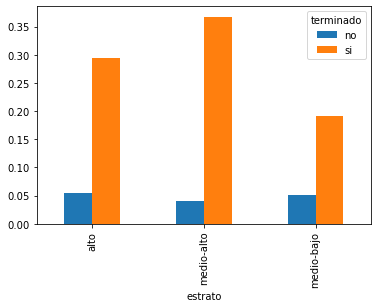

In [4]:

frec_clase_peso = pd.pivot_table(df, columns='terminado', index='estrato', values='administracion', aggfunc='count')
frec_rel_clase_peso = frec_clase_peso/frec_clase_peso.sum().sum()
pd.concat([frec_clase_peso, frec_rel_clase_peso], axis=1)
frec_rel_clase_peso.plot(kind='bar')
plt.show()

el estrarto alto es el que mas modificaciones ha hecho a sus vivienda esto se debe a su poder adqusitivo puede gastar en comodities

Elabore un histograma de frecuencias relativas para la variable precio. ¿Qué observa? Comente

In [7]:
hist, hedges = np.histogram(df.precio, density=True, bins='sturges')
plot = figure(plot_width=350, plot_height=350)
plot.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hist)

show(plot, notebook_url="localhost:8888")

Right-Skewed <br>
Mode < Median < Mean

5. ¿Es muy diferente el comportamiento de los precios de las propiedades de acuerdo a la ubicación? Comente. Elabore los gráficos y/o resúmenes que considere pertinentes. 
6. Grafique un diagrama de dispersión de las variables avalúo y precio. ¿Qué observa? ¿Qué pasa si los puntos graficados se separan por color de acuerdo a la nueva categorización del estrato?. Explique.
7. Calcule el coeficiente de correlación de Pearson entre precio y avalúo. ¿Qué se puede decir sobre este valor?
8. Realice un análisis descriptivo adicional que considere pertinente sobre una o varias de las variables restantes de la base de datos.

* para analizar todos estos puntos se puede usar los resultados dinamicos del punto 2 donde esta un dashboard se obsevra una rango de precio muy uniforme en todas exeptuando en el sectro del poblado. me atreveria a tratar el resto de las zonas para el analisis de precio como un sola componente
* si se separa por colores ya que existe una correlacion entre las variables donde el precio es directamente porporcional al avaluo y al estrato.
* existe una alta correlacion entre precio y avaluo de 0.79 pearson, 0.73 kendall y 0.89 spearman. son directamente proporcionales estas variable

In [58]:
print('pearson')
df.corr(method='pearson')

pearson


,precio,mt2,alcobas,banos,administracion,avaluo
precio,1.000000,0.858258,0.186486,0.626714,0.752635,0.789532
mt2,0.858258,1.000000,0.309660,0.666821,0.774457,0.752844
alcobas,0.186486,0.309660,1.000000,0.348839,0.162141,0.153776
banos,0.626714,0.666821,0.348839,1.000000,0.548519,0.525388
administracion,0.752635,0.774457,0.162141,0.548519,1.000000,0.699940
avaluo,0.789532,0.752844,0.153776,0.525388,0.699940,1.000000


In [59]:
print('kendall')
df.corr(method='kendall')


kendall


,precio,mt2,alcobas,banos,administracion,avaluo
precio,1.000000,0.691112,0.183422,0.528952,0.631613,0.728734
mt2,0.691112,1.000000,0.351120,0.568227,0.537398,0.615403
alcobas,0.183422,0.351120,1.000000,0.390693,0.132870,0.149547
banos,0.528952,0.568227,0.390693,1.000000,0.455221,0.493667
administracion,0.631613,0.537398,0.132870,0.455221,1.000000,0.614645
avaluo,0.728734,0.615403,0.149547,0.493667,0.614645,1.000000


In [61]:
print('spearman')
df.corr(method='spearman')

spearman


,precio,mt2,alcobas,banos,administracion,avaluo
precio,1.000000,0.860306,0.230107,0.643962,0.808159,0.889236
mt2,0.860306,1.000000,0.438344,0.688199,0.691744,0.797928
alcobas,0.230107,0.438344,1.000000,0.419966,0.162521,0.187560
banos,0.643962,0.688199,0.419966,1.000000,0.555050,0.605933
administracion,0.808159,0.691744,0.162521,0.555050,1.000000,0.794512
avaluo,0.889236,0.797928,0.187560,0.605933,0.794512,1.000000
